# Gradient Descent over Reparametrization Group

In this notebook, I want to create every figure for gradient descent on reparametrization group for curves necessary in my masters. We will mainly concern ourselves with two examples: One of two curves representing the same shape, only differing by a predetermined diffeomorphism, and another example with different shapes generated specifically to have a known analytical solution.

In both cases we are interested in the following figures:
1. Convergence Plots
    1. Logarithmic and Linear
    2. Dual axis, relative and actual.
2. Final Error vs. Number of Basis Elements for Fourier, Jacobi and Palais Basis
3. Example Solution for the Best Result

Afterwards we want to consider the same results for the intermediate interpolation steps. Finally we want to compare the two methods, by plotting the best convergence and basis plots for the two cases.

In [1]:
using Revise
using Reparam
using LaTeXStrings
using Plots
using ProfileView

## Same Shape Optimization 

In [2]:
γopt(x) = 0.5 * log(20x+1) / log(21) + 0.25 * (1 + tanh(20(x-0.5)) / tanh(10))
# γopt(x) = 0.95x^2+ 0.05x

c1(x) = [cos(2π*x), sin(2π*x)]
c2(x) = c1(γopt(x))

c2 (generic function with 1 method)

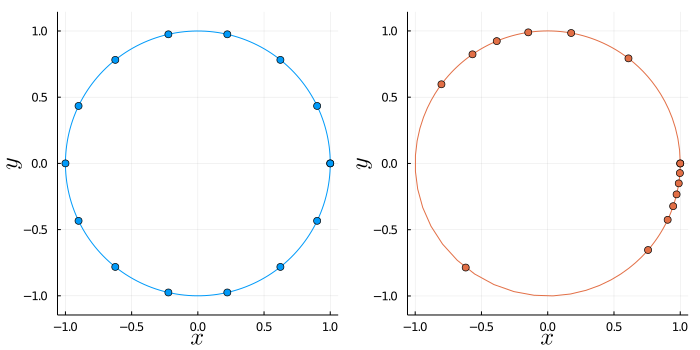

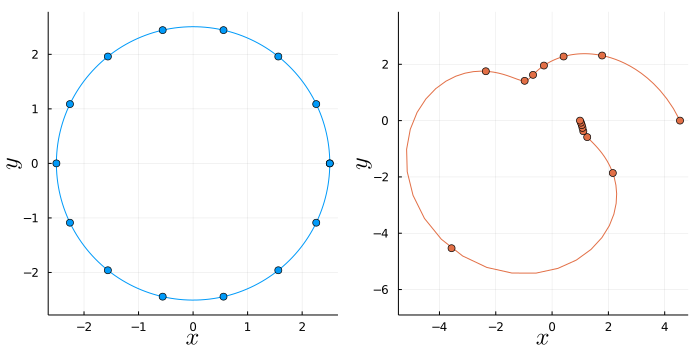

In [3]:
# Some plotting options
Tfine = 200
Tcoarse = 15

p1 = plot_curve(c1, Tfine, color=1, legend=false, xlabel=L"x", ylabel=L"y", size=(600, 600), guidefont=16)
plot_curve!(c1, Tcoarse, seriestype=:scatter, color=1, aspect_ratio=:equal, label="")
p2 = plot_curve(c2, Tfine, color=2, legend=false, xlabel=L"x", ylabel=L"y", size=(600, 600), guidefont=16)
plot_curve!(c2, Tcoarse, seriestype=:scatter, color=2, aspect_ratio=:equal)

display(plot(p1, p2, size=(700, 350)))

r = Qmap(c1)
q = Qmap(c2)


p1 = plot_curve(r, Tfine, color=1, legend=false, xlabel=L"x", ylabel=L"y", guidefont=16, size=(600, 600))
plot_curve!(r, Tcoarse, seriestype=:scatter, color=1, aspect_ratio=:equal, label="")
p2 = plot_curve(q, Tfine, color=2, legend=false, xlabel=L"x", ylabel=L"y", guidefont=16, size=(600, 600))
plot_curve!(q, Tcoarse, seriestype=:scatter, color=2, aspect_ratio=:equal)


plot(p1, p2, size=(700, 350))

 ----------------------------------------------------------------------------------
| Iter | Error            | εmax             | εi               | ||dγ||           | |f_i - f_{i-1}|/ |fi| | 
----------------------------------------------------------------------------------
|    0 | 5.6035257330e+00 |                  |                  |                  |
|    1 | 4.4392609935e+00 | 4.7795207940e-02 | 4.5405447543e-02 | 2.4023479373e+01 | 2.0777360451e-01 |
|    2 | 3.4652501105e+00 | 3.0550363683e-02 | 1.4511422749e-02 | 2.4625074457e+01 | 2.1940833946e-01 |
|    3 | 1.4630059125e+00 | 2.9614862546e-02 | 7.0335298548e-03 | 1.5564161772e+01 | 5.7780654618e-01 |
|    4 | 1.4224510082e+00 | 4.7854810872e-02 | 5.6827587911e-03 | 1.9138199063e+01 | 2.7720259991e-02 |
|    5 | 1.2732666141e+00 | 3.8186064381e-02 | 4.5345951452e-03 | 2.1186699119e+01 | 1.0487840585e-01 |
|    6 | 8.3587199985e-01 | 3.7003323840e-02 | 2.1970723530e-03 | 6.0772392072e+00 | 3.4352162336e-01 |
|    7 | 7.813

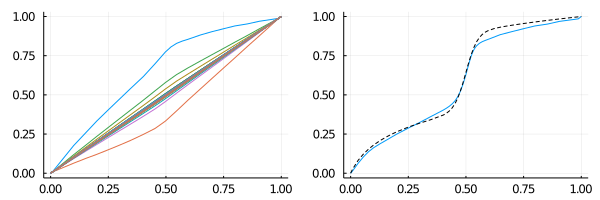

In [20]:
I = GaussLegendre(128)

proj = FourierProjector(4)
proj = JacobiProjector(6, I=I)
proj = Reparam.PalaisOrthogonalProjector(16, I)

# proj = Reparam.PalaisProjector(6, I)
@time res, rn = reparametrize(q, r, proj, maxiter=50, I=I, lsconfig=BacktrackConfig(c=0.9, ρ=0.5,verbose=false), α_step=0.95, gtol=1e-6, rtol=1e-6);

p1 = plot(legend=false)
for i in 2:length(rn.γ.V)
    plot!(rn.γ.V[i], 0, 1)
end
plot!()

p2 = plot(rn.γ, 0, 1)
plot!(γopt, 0, 1, ls=:dash, c=:black, legend=false)

plot(p1, p2, layout=(1, 2), size=(600, 200))

 ----------------------------------------------------------------------------------
| Iter | Error            | εmax             | εi               | ||dγ||           | |f_i - f_{i-1}|/ |fi| | 
----------------------------------------------------------------------------------
|    0 | 5.6035257330e+00 |                  |                  |                  |
|    1 | 4.8222614814e+00 | 1.2583164563e-04 | 1.1954006335e-04 | 1.9840187757e+03 | 1.3942369301e-01 |
|    2 | 4.6993566411e+00 | 1.6046428755e-04 | 7.6220536585e-05 | 9.6670758566e+02 | 2.5486971375e-02 |
|    3 | 4.6831128449e+00 | 5.0333244274e-04 | 5.9770727575e-05 | 8.3208289492e+02 | 3.4566000144e-03 |
|    4 | 4.6706467269e+00 | 5.2210447130e-04 | 6.1999905967e-05 | 5.9836038570e+02 | 2.6619298663e-03 |
|    5 | 4.6701203892e+00 | 9.7038772832e-04 | 2.8808385685e-05 | 4.9396293322e+02 | 1.1269053906e-04 |
|    6 | 4.6701203892e+00 | 1.1755584648e-03 | 3.1740812049e-17 | 4.9396293322e+02 | 0.0000000000e+00 |
 -------------

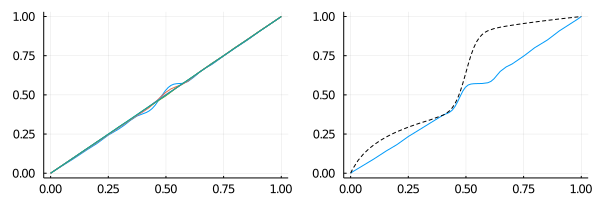

In [15]:
I = GaussLegendre(128)
proj = Reparam.PalaisProjector(16, I)

# proj = Reparam.PalaisProjector(6, I)
@time res, rn = reparametrize(q, r, proj, maxiter=50, I=I, lsconfig=BacktrackConfig(c=0.1, ρ=0.5,verbose=false), α_step=0.95, gtol=1e-6, rtol=1e-6);

p1 = plot(legend=false)
for i in 2:length(rn.γ.V)
    plot!(rn.γ.V[i], 0, 1)
end
plot!()

p2 = plot(rn.γ, 0, 1)
plot!(γopt, 0, 1, ls=:dash, c=:black, legend=false)

plot(p1, p2, layout=(1, 2), size=(600, 200))

## Different Shape Optimization 

In [12]:
range(0, 1, length=201)

0.0:0.005:1.0

In [18]:
@profview reparametrize(q, r, proj, maxiter=1, I=I, lsconfig=BacktrackConfig(c=0.95, ρ=0.5,verbose=false), α_step=0.5, gtol=1e-6, rtol=1e-6);
@profview reparametrize(q, r, proj, maxiter=50, I=I, lsconfig=BacktrackConfig(c=0.95, ρ=0.5,verbose=false), α_step=0.5, gtol=1e-6, rtol=1e-6);


 ----------------------------------------------------------------------------------
| Iter | Error            | εmax             | εi               | ||dγ||           | |f_i - f_{i-1}|/ |fi| | 
----------------------------------------------------------------------------------
|    0 | 5.6035257330e+00 |                  |                  |                  |
|    1 | 3.0541214379e+00 | 4.7795207940e-02 | 2.3897603970e-02 | 7.0007472131e+00 | 4.5496432364e-01 |
 ----------------------------------------------------------------------------------
 ----------------------------------------------------------------------------------
| Iter | Error            | εmax             | εi               | ||dγ||           | |f_i - f_{i-1}|/ |fi| | 
----------------------------------------------------------------------------------
|    0 | 5.6035257330e+00 |                  |                  |                  |
|    1 | 3.0541214379e+00 | 4.7795207940e-02 | 2.3897603970e-02 | 7.0007472131e+00 | 4.5

In [ ]:
γopt(x) = x - sin(2π*x) / (2π)

c1(x) = [cos(π*x), sin(π*x)] / (cbrt(π))
c2(x) = [0, cbrt(3x + 1)]

plot(γopt, 0, 1)

In [ ]:
# Some plotting options
Tfine = 200
Tcoarse = 15

p1 = plot_curve(c1, Tfine, color=1, legend=false, xlabel=L"x", ylabel=L"y", size=(600, 600), guidefont=16)
plot_curve!(c1, Tcoarse, seriestype=:scatter, color=1, aspect_ratio=:equal, label="")
p2 = plot_curve(c2, Tfine, color=2, legend=false, xlabel=L"x", ylabel=L"y", size=(600, 600), guidefont=16)
plot_curve!(c2, Tcoarse, seriestype=:scatter, color=2, aspect_ratio=:equal)

display(plot(p1, p2, size=(700, 350)))

q = Qmap(c1)
r = Qmap(c2)


p1 = plot_curve(r, Tfine, color=1, legend=false, xlabel=L"x", ylabel=L"y", guidefont=16, size=(600, 600))
plot_curve!(r, Tcoarse, seriestype=:scatter, color=1, aspect_ratio=:equal, label="")


p2 = plot_curve(q, Tfine, color=2, legend=false, xlabel=L"x", ylabel=L"y", guidefont=16, size=(600, 600))
plot_curve!(q, Tcoarse, seriestype=:scatter, color=2, aspect_ratio=:equal)


plot(p1, p2, size=(700, 350))

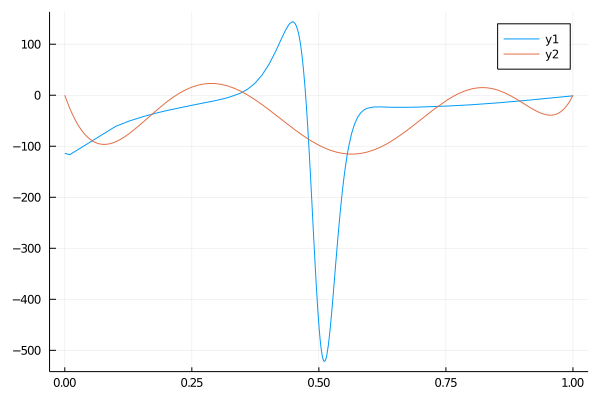

In [8]:
ψ = Diffeomorphism(proj)
rn = Reparam.ReparametrizedQmap(r, ψ)
δE = l2_gradient(q, rn)
plot(x -> δE(x), 0, 1)
∇E = Reparam.project(δE, proj)
plot!(∇E, 0, 1)

In [ ]:
I = GaussLegendre(128)
proj = FourierProjector(10)
# proj = JacobiProjector(10)
# proj = Reparam.PalaisProjector(12, I)

@time res, rn = reparametrize(q, r, proj, maxiter=100, I=I, α_step=0.5, gtol=1e-6, rtol=1e-6);

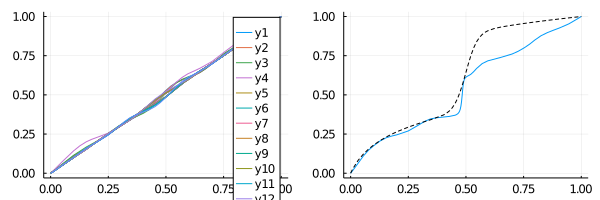

In [61]:
p1 = plot()
for i in 2:length(rn.γ.V)
    plot!(rn.γ.V[i], 0, 1)
end
plot!()

p2 = plot(rn.γ, 0, 1)
plot!(γopt, 0, 1, ls=:dash, c=:black, legend=false)

plot(p1, p2, layout=(1, 2), size=(600, 200))

In [36]:
@code_warntype reparametrize(q, r, proj, maxiter=20, I=I, α_step=0.1, gtol=1e-6, rtol=1e-6);

Variables
  #unused#::Core.Compiler.Const(Reparam.var"#reparametrize##kw"(), false)
  @_2::NamedTuple{(:maxiter, :I, :α_step, :gtol, :rtol),Tuple{Int64,GaussLegendre,Float64,Float64,Float64}}
  @_3::Core.Compiler.Const(Reparam.reparametrize, false)
  q::Core.Compiler.Const(Reparam.var"#28#29"{typeof(c2),Reparam.var"#30#31"{typeof(c2)}}(c2, Reparam.var"#30#31"{typeof(c2)}(c2)), false)
  r::Core.Compiler.Const(Reparam.var"#28#29"{typeof(c1),Reparam.var"#30#31"{typeof(c1)}}(c1, Reparam.var"#30#31"{typeof(c1)}(c1)), false)
  projector::Reparam.OrthogonalProjector{Reparam.JacobiBasisFunction}
  I::GaussLegendre
  maxiter::Int64
  verbosity::Int64
  rtol::Float64
  gtol::Float64
  α_step::Float64
  lsconfig::BacktrackConfig
  @_14::GaussLegendre
  @_15::Int64
  @_16::Int64
  @_17::Float64
  @_18::Float64
  @_19::Float64
  @_20::BacktrackConfig

Body::Tuple{Reparam.ReparametrizationSolution{Function},Reparam.ReparametrizedQmap{Reparam.var"#28#29"{typeof(c1),Reparam.var"#30#31"{typeof(c1)}},Di

In [ ]:
plot_curve(q, 15, 200)
plot_curve!(ropt, 15, 200)